# Plotting the temporal evolution of the number of tumor cells

## Import libraries

In [60]:
#  add Python-loader repo to the path 
import sys
sys.path.insert(0, '../Python-loader/')
from pyMCDS import pyMCDS

import numpy as np
import matplotlib.pyplot as plt

## List *.xml* output files

In [61]:
## Type pyMCDS. and hit the tab key to see methods 

!ls ./output/*.xml 

./output/final.xml
./output/initial.xml
./output/output00000000.xml
./output/output00000001.xml
./output/output00000002.xml
./output/output00000003.xml
./output/output00000004.xml
./output/output00000005.xml
./output/output00000006.xml
./output/output00000007.xml
./output/output00000008.xml
./output/output00000009.xml
./output/output00000010.xml
./output/output00000011.xml
./output/output00000012.xml
./output/output00000013.xml
./output/output00000014.xml
./output/output00000015.xml
./output/output00000016.xml
./output/output00000017.xml
./output/output00000018.xml
./output/output00000019.xml
./output/output00000020.xml
./output/output00000021.xml
./output/output00000022.xml
./output/output00000023.xml
./output/output00000024.xml
./output/output00000025.xml
./output/output00000026.xml
./output/output00000027.xml
./output/output00000028.xml
./output/output00000029.xml
./output/output00000030.xml
./output/output00000031.xml
./output/output00000032.xml
./output/output00000033.xml
./output

## Read an *.xml* output file

In [62]:
mcds = pyMCDS('final.xml', 'output')

Reading output/final.xml
Reading output/initial_mesh0.mat
Reading output/final_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/final_cells.mat


## Print information about the file

In [63]:
print(mcds.get_time())  # what simulation time is saved here?

7200.01


In [64]:
print(mcds.get_cell_variables()) # what data are saved in the cells?

['ID', 'position_x', 'position_y', 'position_z', 'total_volume', 'cell_type', 'cycle_model', 'current_phase', 'elapsed_time_in_phase', 'nuclear_volume', 'cytoplasmic_volume', 'fluid_fraction', 'calcified_fraction', 'orientation_x', 'orientation_y', 'orientation_z', 'polarity', 'velocity_x', 'velocity_y', 'velocity_z', 'pressure', 'number_of_nuclei', 'damage', 'total_attack_time', 'contact_with_basement_membrane', 'current_cycle_phase_exit_rate', 'dead', 'current_death_model', 'death_rates_0', 'death_rates_1', 'cytoplasmic_biomass_change_rate', 'nuclear_biomass_change_rate', 'fluid_change_rate', 'calcification_rate', 'target_solid_cytoplasmic', 'target_solid_nuclear', 'target_fluid_fraction', 'radius', 'nuclear_radius', 'surface_area', 'cell_cell_adhesion_strength', 'cell_BM_adhesion_strength', 'cell_cell_repulsion_strength', 'cell_BM_repulsion_strength', 'cell_adhesion_affinities', 'relative_maximum_adhesion_distance', 'maximum_number_of_attachments', 'attachment_elastic_constant', 'at

In [65]:
print(mcds.get_substrate_names())  # what diffusing substrates?

['oxygen']


In [66]:
mcds.data.keys()

dict_keys(['metadata', 'mesh', 'continuum_variables', 'discrete_cells'])

## Plot a snapshot of the tumor growth dynamics

In [67]:
cx = mcds.data['discrete_cells']['position_x']
cy = mcds.data['discrete_cells']['position_y']
cp = mcds.data['discrete_cells']['current_phase']
print(cp)

[2. 2. 2. ... 3. 3. 3.]


Text(0, 0.5, 'y')

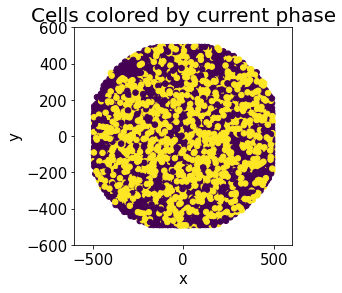

In [68]:
import matplotlib 

# %matplotlib qt 

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)

plt.scatter( cx, cy, c=cp, s=30 )

plt.axis( 'image' )
plt.axis( [-600,600,-600,600] )

# plt.colorbar()

plt.title( 'Cells colored by current phase', size=20)
plt.xlabel( 'x', size=15 ) 
plt.ylabel( 'y', size=15 )

## Compute the number of each tumor cell phenotype

In [69]:
# CELL CYCLE MODELS
### advanced_Ki67_cycle_model = 0
### basic_Ki67_cycle_model = 1
### flow_cytometry_cycle_model = 2
### live_apoptotic_cycle_model = 3
### total_cells_cycle_model = 4
### live_cells_cycle_model = 5 
### flow_cytometry_separated_cycle_model = 6
### cycling_quiescent_model = 7
cycle_model = 1

In [70]:
cp = cp.astype( int )

# CYCLE PHASES
### Ki67_positive_premitotic = 0 
### Ki67_positive_postmitotic = 1 
### Ki67_positive = 2
### Ki67_negative = 3 
### G0G1_phase = 4
### G0_phase = 5
### G1_phase = 6 
### G1a_phase = 7 
### G1b_phase = 8
### G1c_phase = 9
### S_phase = 10
### G2M_phase = 11
### G2_phase = 12
### M_phase = 13
### live = 14

### G1pm_phase = 15
### G1ps_phase = 16 

### cycling = 17 
### quiescent = 18 
if cycle_model == 0:
    Ki67_negative = np.argwhere( cp == 3 ).flatten()
    Ki67_positive_premitotic = np.argwhere( cp == 0 ).flatten()
    Ki67_positive_postmitotic = np.argwhere( cp == 1 ).flatten()
    
    n_Ki67_negative = len( Ki67_negative )
    n_Ki67_positive_premitotic = len( Ki67_positive_premitotic )
    n_Ki67_positive_postmitotic = len( Ki67_positive_postmitotic )
    
    print("Ki67_negative = " + str(n_Ki67_negative))
    print("Ki67_positive_premitotic = " + str(n_Ki67_positive_premitotic))
    print("Ki67_positive_postmitotic = " + str(n_Ki67_positive_postmitotic))
elif cycle_model == 1:
    Ki67_negative = np.argwhere( cp == 3 ).flatten()
    Ki67_positive = np.argwhere( cp == 2 ).flatten()
    
    n_Ki67_negative = len( Ki67_negative )
    n_Ki67_positive = len( Ki67_positive )
    
    print("Ki67_negative = " + str(n_Ki67_negative))
    print("Ki67_positive = " + str(n_Ki67_positive))
elif cycle_model == 2:
    G0G1_phase = np.argwhere( cp == 4 ).flatten()
    S_phase = np.argwhere( cp == 10 ).flatten()
    G2M_phase = np.argwhere( cp == 11 ).flatten()
    
    n_G0G1_phase = len( G0G1_phase )
    n_S_phase = len( S_phase )
    n_G2M_phase = len( G2M_phase )
    
    print("G0G1_phase = " + str(n_G0G1_phase))
    print("S_phase = " + str(n_S_phase))
    print("G2M_phase = " + str(n_G2M_phase))
elif cycle_model == 5:
    live = np.argwhere( cp == 14 ).flatten()
    
    n_live = len( live )
    
    print("live = " + str(n_live))
elif cycle_model == 6:
    G0G1_phase = np.argwhere( cp == 4 ).flatten()
    S_phase = np.argwhere( cp == 10 ).flatten()
    G2_phase = np.argwhere( cp == 12 ).flatten()
    M_phase = np.argwhere( cp == 13 ).flatten()
    
    n_G0G1_phase = len( G0G1_phase )
    n_S_phase = len( S_phase )
    n_G2_phase = len( G2_phase )
    n_M_phase = len( M_phase )
    
    print("G0G1_phase = " + str(n_G0G1_phase))
    print("S_phase = " + str(n_S_phase))
    print("G2_phase = " + str(n_G2_phase))
    print("M_phase = " + str(n_M_phase))
else:
    print("Unrecognized cell cycle model.")

Ki67_negative = 1923
Ki67_positive = 3708


In [71]:
# DEATH PHASES
### apoptotic = 100
### necrotic_swelling = 101
### necrotic_lysed = 102
### necrotic = 103 
### debris = 104
apoptotic = np.argwhere( cp == 100 ).flatten()
necrotic = np.argwhere( cp == 103 ).flatten()

n_apoptotic = len( apoptotic )
n_necrotic = len( necrotic )

print("apoptotic = " + str(n_apoptotic))
print("necrotic = " + str(n_necrotic))

apoptotic = 0
necrotic = 0


## Plot a snapshot of the oxygen dispersion dynamics

Text(0, 0.5, 'y')

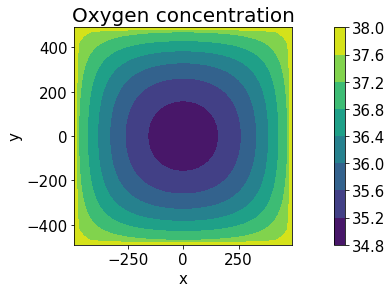

In [72]:
o2 = mcds.get_concentrations( 'oxygen' );
X,Y = mcds.get_2D_mesh(); 

plt.clf()
plt.contourf(X, Y, o2[:,:,0]);
plt.colorbar()
plt.axis('image')

plt.title( 'Oxygen concentration', size=20)
plt.xlabel( 'x', size=15 ) 
plt.ylabel( 'y', size=15 )

# Plot a snapshot of both tumor cell and oxygen dispersion dynamics

Text(0, 0.5, 'y')

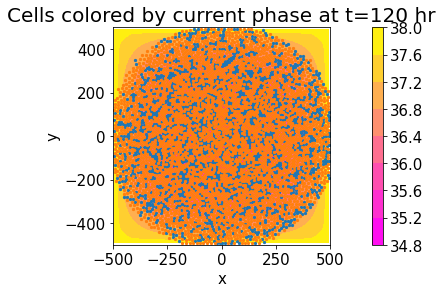

In [73]:
circle_size = 5

t = mcds.get_time();
o2 = mcds.get_concentrations( 'oxygen' );
X,Y = mcds.get_2D_mesh();

plt.clf()
plt.contourf(X, Y, o2[:,:,0], cmap='spring');
plt.colorbar()

if cycle_model == 0:
    plt.scatter( cx[Ki67_negative], cy[Ki67_negative], s=circle_size);
    plt.scatter( cx[Ki67_positive_premitotic], cy[Ki67_positive_premitotic], s=circle_size);
    plt.scatter( cx[Ki67_positive_postmitotic], cy[Ki67_positive_postmitotic], s=circle_size);
elif cycle_model == 1:
    plt.scatter( cx[Ki67_negative], cy[Ki67_negative], s=circle_size);
    plt.scatter( cx[Ki67_positive], cy[Ki67_positive], s=circle_size);
elif cycle_model == 2:
    plt.scatter( cx[G0G1_phase], cy[G0G1_phase], s=circle_size);
    plt.scatter( cx[S_phase], cy[S_phase], s=circle_size);
    plt.scatter( cx[G2M_phase], cy[G2M_phase], s=circle_size);
elif cycle_model == 5:
    plt.scatter( cx[live], cy[live], s=circle_size);
elif cycle_model == 6:
    plt.scatter( cx[G0G1_phase], cy[G0G1_phase], s=circle_size);
    plt.scatter( cx[S_phase], cy[S_phase], s=circle_size);
    plt.scatter( cx[G2_phase], cy[G2_phase], s=circle_size);
    plt.scatter( cx[M_phase], cy[M_phase], s=circle_size);
else:
    print("Unrecognized cell cycle model.")
plt.scatter( cx[apoptotic], cy[apoptotic], s=circle_size);
plt.scatter( cx[necrotic], cy[necrotic], s=circle_size);

plt.axis('image')
plt.axis([-500, 500, -500, 500])
plt.title( 'Cells colored by current phase at t=' +str(int(t/60)) + ' hr', size=20)
plt.xlabel( 'x', size=15 ) 
plt.ylabel( 'y', size=15 )

## Compute the number of each tumor cell phenotype over all simulation times

In [74]:
last_index = 120;

times = np.zeros( last_index+1 ); 
if cycle_model == 0:
    Ki67_negative_count = np.zeros( last_index+1 ); 
    Ki67_positive_premitotic_count = np.zeros( last_index+1 ); 
    Ki67_positive_postmitotic_count = np.zeros( last_index+1 ); 
elif cycle_model == 1:
    Ki67_negative_count = np.zeros( last_index+1 ); 
    Ki67_positive_count = np.zeros( last_index+1 ); 
elif cycle_model == 2:
    G0G1_phase_count = np.zeros( last_index+1 ); 
    S_phase_count = np.zeros( last_index+1 ); 
    G2M_phase_count = np.zeros( last_index+1 ); 
elif cycle_model == 5:
    live_count = np.zeros( last_index+1 ); 
elif cycle_model == 6:
    G0G1_phase_count = np.zeros( last_index+1 ); 
    S_phase_count = np.zeros( last_index+1 ); 
    G2_phase_count = np.zeros( last_index+1 ); 
    M_phase_count = np.zeros( last_index+1 ); 
else:
    print("Unrecognized cell cycle model.")
apoptotic_count = np.zeros( last_index+1 ); 
necrotic_count = np.zeros( last_index+1 ); 

for n in range( 0, last_index+1 ):
    filename = 'output'+"%08i"%n+'.xml'
    mcds = pyMCDS(filename, 'output')
    
    times[n] = mcds.get_time()
    cp = mcds.data['discrete_cells']['current_phase']
    if cycle_model == 0:
        Ki67_negative = np.argwhere( cp == 3 ).flatten()
        Ki67_positive_premitotic = np.argwhere( cp == 0 ).flatten()
        Ki67_positive_postmitotic = np.argwhere( cp == 1 ).flatten()

        Ki67_negative_count[n] = len( Ki67_negative )
        Ki67_positive_premitotic_count[n] = len( Ki67_positive_premitotic )
        Ki67_positive_postmitotic_count[n] = len( Ki67_positive_postmitotic )
    elif cycle_model == 1:
        Ki67_negative = np.argwhere( cp == 3 ).flatten()
        Ki67_positive = np.argwhere( cp == 2 ).flatten()

        Ki67_negative_count[n] = len( Ki67_negative )
        Ki67_positive_count[n] = len( Ki67_positive )
    elif cycle_model == 2:
        G0G1_phase = np.argwhere( cp == 4 ).flatten()
        S_phase = np.argwhere( cp == 10 ).flatten()
        G2M_phase = np.argwhere( cp == 11 ).flatten()

        G0G1_phase_count[n] = len( G0G1_phase )
        S_phase_count[n] = len( S_phase )
        G2M_phase_count[n] = len( G2M_phase )
    elif cycle_model == 5:
        live = np.argwhere( cp == 14 ).flatten()

        live_count[n] = len( live )
    elif cycle_model == 6:
        G0G1_phase = np.argwhere( cp == 4 ).flatten()
        S_phase = np.argwhere( cp == 10 ).flatten()
        G2_phase = np.argwhere( cp == 12 ).flatten()
        M_phase = np.argwhere( cp == 13 ).flatten()

        G0G1_phase_count[n] = len( G0G1_phase )
        S_phase_count[n] = len( S_phase )
        G2_phase_count[n] = len( G2_phase )
        M_phase_count[n] = len( M_phase )
    else:
        print("Unrecognized cell cycle model.")
    apoptotic = np.argwhere( cp == 100 ).flatten()
    necrotic = np.argwhere( cp == 103 ).flatten()

    apoptotic_count[n] = len( apoptotic )
    necrotic_count[n] = len( necrotic )

Reading output/output00000000.xml
Reading output/initial_mesh0.mat
Reading output/output00000000_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000000_cells.mat
Reading output/output00000001.xml
Reading output/initial_mesh0.mat
Reading output/output00000001_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000001_cells.mat
Reading output/output00000002.xml
Reading output/initial_mesh0.mat
Reading output/output00000002_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000002_cells.mat
Reading output/output00000003.xml
Reading output/initial_mesh0.mat
Reading output/output00000003_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000003_cells.mat
Reading output/output00000004.xml
Reading output/initial_mesh0.mat
Reading output/output00000004_microenvironment0.mat
Parsing oxygen data
working o

working on discrete cell data...

Reading output/output00000038_cells.mat
Reading output/output00000039.xml
Reading output/initial_mesh0.mat
Reading output/output00000039_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000039_cells.mat
Reading output/output00000040.xml
Reading output/initial_mesh0.mat
Reading output/output00000040_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000040_cells.mat
Reading output/output00000041.xml
Reading output/initial_mesh0.mat
Reading output/output00000041_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000041_cells.mat
Reading output/output00000042.xml
Reading output/initial_mesh0.mat
Reading output/output00000042_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000042_cells.mat
Reading output/output00000043.xml
Reading output/initial_mesh0.mat
Reading

working on discrete cell data...

Reading output/output00000082_cells.mat
Reading output/output00000083.xml
Reading output/initial_mesh0.mat
Reading output/output00000083_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000083_cells.mat
Reading output/output00000084.xml
Reading output/initial_mesh0.mat
Reading output/output00000084_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000084_cells.mat
Reading output/output00000085.xml
Reading output/initial_mesh0.mat
Reading output/output00000085_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000085_cells.mat
Reading output/output00000086.xml
Reading output/initial_mesh0.mat
Reading output/output00000086_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000086_cells.mat
Reading output/output00000087.xml
Reading output/initial_mesh0.mat
Reading

## Plot the temporal evolution of the number of tumor cells

Text(0, 0.5, 'Number of cells')

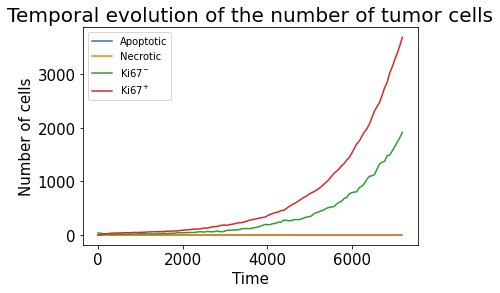

In [75]:
plt.clf()
plt.plot( times, apoptotic_count , '-', label='Apoptotic' ); 
plt.plot( times, necrotic_count , '-', label='Necrotic' ); 
if cycle_model == 0:
    plt.plot( times, Ki67_negative_count , '-', label=r'Ki67$^{-}$' );
    plt.plot( times, Ki67_positive_premitotic_count , '-', label=r'Ki67$^{+}$ (pre)' );
    plt.plot( times, Ki67_positive_postmitotic_count , '-', label=r'Ki67$^{+}$ (post)' );
elif cycle_model == 1:
    plt.plot( times, Ki67_negative_count , '-', label=r'Ki67$^{-}$' );
    plt.plot( times, Ki67_positive_count , '-', label=r'Ki67$^{+}$' );
elif cycle_model == 2:
    plt.plot( times, G0G1_phase_count , '-', label='G0/G1' );
    plt.plot( times, S_phase_count , '-', label='S' );
    plt.plot( times, G2M_phase_count , '-', label='G2/M' );
elif cycle_model == 5:
    plt.plot( times, live_count , '-', label='Live' );
elif cycle_model == 6:
    plt.plot( times, G0G1_phase_count , '-', label='G0/G1' );
    plt.plot( times, S_phase_count , '-', label='S' );
    plt.plot( times, G2_phase_count , '-', label='G2' );
    plt.plot( times, M_phase_count , '-', label='M' );
else:
    print("Unrecognized cell cycle model.")
plt.legend()

plt.title( 'Temporal evolution of the number of tumor cells', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Number of cells', size=15 )

## Compute growth rate of the live cells

In [76]:
if cycle_model == 0:
    poly = np.polyfit( times, np.log(Ki67_negative_count + Ki67_positive_premitotic_count + Ki67_positive_postmitotic_count), 1) 
elif cycle_model == 1:
    poly = np.polyfit( times, np.log(Ki67_negative_count + Ki67_positive_count), 1) 
elif cycle_model == 2:
    poly = np.polyfit( times, np.log(G0G1_phase_count + S_phase_count + G2M_phase_count), 1) 
elif cycle_model == 5:
    poly = np.polyfit( times, np.log(live_count), 1) 
elif cycle_model == 6:
    poly = np.polyfit( times, np.log(G0G1_phase_count + S_phase_count + G2_phase_count + M_phase_count), 1) 
else:
    print("Unrecognized cell cycle model.")
print( poly[0] )
# growth rate is 0th element
# in units of 1/min 

0.000713514510106747
